In [1]:
from matplotlib import pyplot as plt
import matplotlib.pyplot as pltfig
from skimage import io, color
import cv2 as cv2
import numpy as np
from lxml import etree
import argparse

# Exercise 3.1

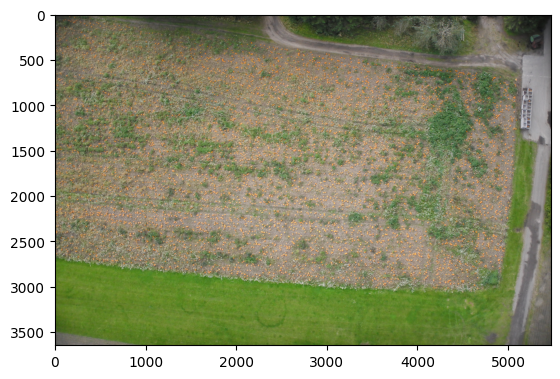

In [70]:
file = "sample_images\EB-02-660_0595_0007.jpg"
file_annot = "sample_images\EB-02-660_0595_0007annotated_new.jpg"
img = cv2.imread(file)
img_annot = cv2.imread(file_annot)
lower_limit = (0, 0, 245)
upper_limit = (10, 10, 256)
mask = cv2.inRange(img_annot, lower_limit, upper_limit)
mean, std = cv2.meanStdDev(img, mask = mask)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

In [3]:
rgb = io.imread(file)
lab_img = color.rgb2lab(rgb)
hsv_img = color.rgb2hsv(rgb)

In [4]:
pixels = np.reshape(img, (-1, 3))
pixels_lab = np.reshape(lab_img, (-1,3))
pixels_hsv = np.reshape(hsv_img, (-1,3))
mask_pixels = np.reshape(mask, (-1))
annot_pix_values_bgr = pixels[mask_pixels == 255, ]
annot_pix_values_lab = pixels_lab[mask_pixels == 255, ]
annot_pix_values_hsv = pixels_hsv[mask_pixels == 255, ]

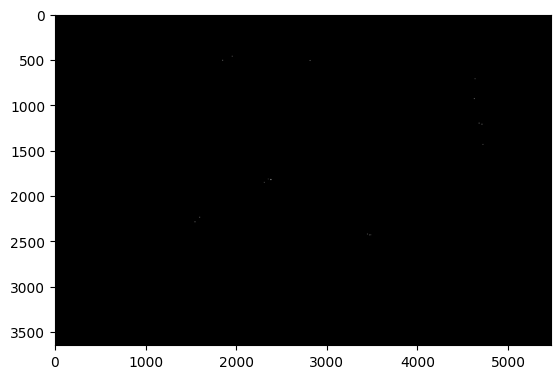

In [5]:
RGB_mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_mask)

In [6]:
np.savetxt("annot_pix_values_bgr.csv", annot_pix_values_bgr, delimiter=",",fmt="%d")
np.savetxt("annot_pix_values_lab.csv", annot_pix_values_lab, delimiter=",",fmt="%d")
np.savetxt("annot_pix_values_hsv.csv", annot_pix_values_hsv, delimiter=",",fmt="%f")

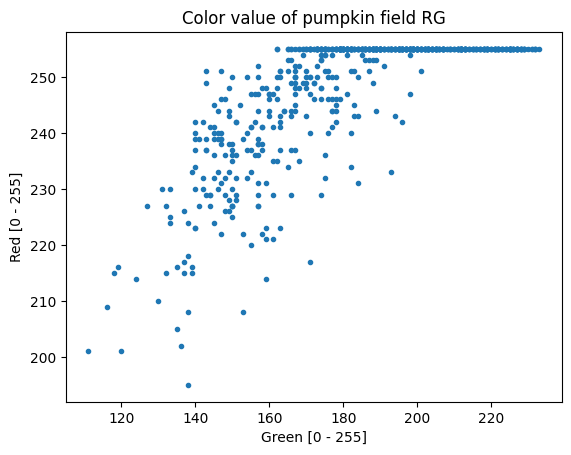

In [7]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax1.plot(annot_pix_values_bgr[:, 1], annot_pix_values_bgr[:, 2], '.')
ax1.set_title('Color value of pumpkin field RG')
plt.xlabel("Green [0 - 255]")
plt.ylabel("Red [0 - 255]")
plt.savefig("color_distribution_RGB.pdf", dpi=150)

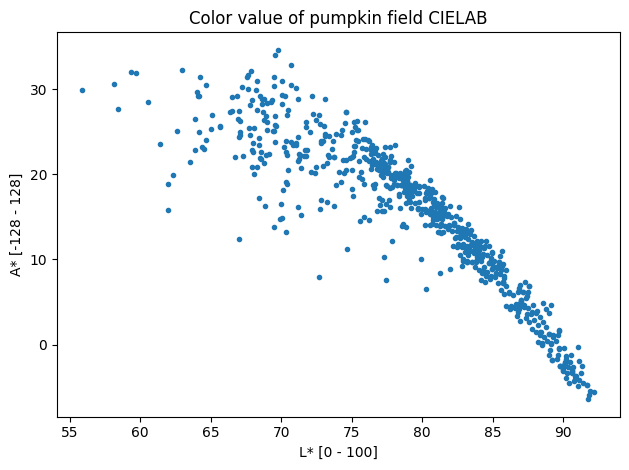

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(annot_pix_values_lab[:, 0], annot_pix_values_lab[:, 1], '.')
ax1.set_title('Color value of pumpkin field CIELAB')
plt.xlabel("L* [0 - 100]")
plt.ylabel("A* [-128 - 128]")
fig.tight_layout()
plt.savefig("color_distribution_LAB.pdf", dpi=150)

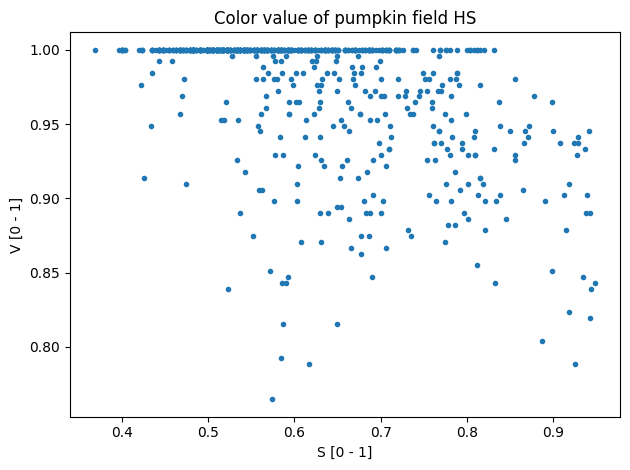

In [9]:
fig, ax1 = plt.subplots()
ax1.plot(annot_pix_values_hsv[:, 1], annot_pix_values_hsv[:, 2], '.')
ax1.set_title('Color value of pumpkin field HS')
plt.xlabel("S [0 - 1]")
plt.ylabel("V [0 - 1]")
fig.tight_layout()
plt.savefig("color_distribution_HS.pdf", dpi=150)

In [10]:
annot_pix_values_hsv
avg_hsv = np.average(annot_pix_values_hsv, axis=0)
avg_hsv[2]

0.9755834322201499

In [48]:
mult = 2.5

lower_limits = (mean[0][0]-(std[0][0]*mult), mean[1][0]-(std[1][0]*mult), mean[2][0]-(std[2][0]*mult))
upper_limits = (mean[0][0]+(std[0][0]*mult), mean[1][0]+(std[1][0]*mult), mean[2][0]+(std[2][0]*mult))
segmented_image = cv2.inRange(img,lower_limits, upper_limits)
segmented_image_RGB = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
cv2.imwrite('avg_segment.jpg', segmented_image_RGB)

True

In [12]:
pixels = np.reshape(img, (-1, 3))
mask_pixels = np.reshape(mask, (-1))
annot_pix_values = pixels[mask_pixels == 255, ]
avg = np.average(annot_pix_values, axis=0)
cov = np.cov(annot_pix_values.transpose())

In [13]:
shape = pixels.shape
avg_value = np.repeat([avg],shape[0], axis=0)
diff = pixels - avg_value
dotproduct = diff * diff
euc_dist = np.sum(dotproduct, axis=1)
euc_dist_image = np.reshape(euc_dist,(img.shape[0], img.shape[1]))
cv2.imwrite('euc_dist_image.jpg', euc_dist_image)

True

In [14]:
euc_dist.shape

(19961856,)

In [15]:
inv_cov = np.linalg.inv(cov)
moddotproduct = diff * (diff @ inv_cov)
mahalanobis_dist = np.sum(moddotproduct,axis=1)
mahalanobis_distance_image = np.reshape(mahalanobis_dist,(img.shape[0],img.shape[1]))
cv2.imwrite('mahalanobis_distance_image.jpg', mahalanobis_distance_image)

True

In [16]:
mahalanobis_distance_image

array([[462.11280704, 482.97854507, 482.97854507, ..., 597.98058873,
        583.89207261, 560.8067843 ],
       [462.11280704, 482.97854507, 482.97854507, ..., 602.71631796,
        588.56846606, 569.98156384],
       [487.21102846, 495.73533103, 478.76584028, ..., 597.98058873,
        593.2646381 , 579.23545776],
       ...,
       [347.09364702, 347.09364702, 354.20495902, ..., 427.64208288,
        435.60478409, 439.61580259],
       [334.7835935 , 334.7835935 , 329.66149243, ..., 408.81362145,
        419.75849605, 419.75849605],
       [317.69529024, 327.88893642, 322.82708076, ..., 393.49797305,
        401.41209558, 416.90680223]])

In [18]:
segmented_image_RGB = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

# Exercise 3.2

In [19]:
file_euc_dist = "euc_dist_image.jpg"
img_file_euc_dist = cv2.imread(file_euc_dist)
mahalanobis_dist = "mahalanobis_distance_image.jpg"
img_mahalanobis_dist = cv2.imread(mahalanobis_dist)

In [72]:
#3.2.1
img_copy = img.copy()
contours, _ = cv2.findContours(segmented_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_blobs = 0
for contour in contours:
    cv2.drawContours(img_copy, [contour], -1, (0, 255, 0), 2)
    num_blobs += 1

# Display the results
cv2.namedWindow('Regular Image with Contours', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Regular Image with Contours', 1600, 800)

cv2.imshow("Regular Image with Contours", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Number of color blobs found: {num_blobs}")

Number of color blobs found: 7800


In [73]:
#3.2.2 filter
#segmented_image_filted = cv2.medianBlur(segmented_image, 1)
kernel_size = (3, 3)
segmented_image_filted = cv2.GaussianBlur(segmented_image, kernel_size, 0)

In [75]:
#3.2.3
img_copy = img.copy()
contours, _ = cv2.findContours(segmented_image_filted, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
num_blobs = 0
for contour in contours:
    (x,y),radius = cv2.minEnclosingCircle([contour][0])
    center = (int(x),int(y))
    radius = int(radius)
    cv2.circle(img_copy,center,radius,(0,255,0),2)
    num_blobs += 1

# Display the results
cv2.namedWindow('Regular Image with Circle', cv2.WINDOW_NORMAL)
cv2.resizeWindow('Regular Image with Circle', 1600, 800)

cv2.imshow("Regular Image with Circle", img_copy)
cv2.waitKey(0)
cv2.destroyAllWindows()

print(f"Number of color blobs found: {num_blobs}")

Number of color blobs found: 6142


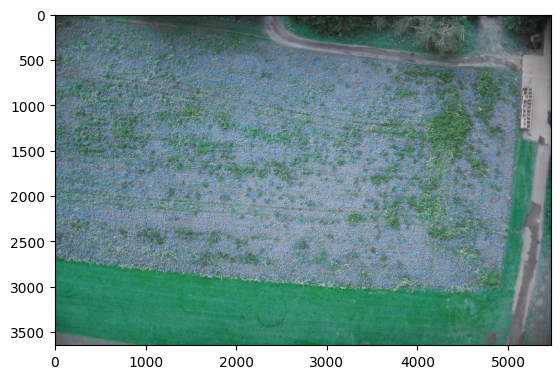

In [76]:
plt.imshow(img)

# 3.3 Exercise done

# Exercise 3.4 

In [159]:
# import rasterio
from rasterio.windows import Window
import numpy as np
import cv2 as cv2

# Load the orthomosaic image
with rasterio.open('PumpkinField.tif') as src:

    # Get the image width and height
    img_width = src.width
    img_height = src.height

    # Define the tile size
    tile_size = 1024

    total_pumpkins = 0
    lower_limits = (mean[0][0]-(std[0][0]*mult), mean[1][0]-(std[1][0]*mult), mean[2][0]-(std[2][0]*mult))
    upper_limits = (mean[0][0]+(std[0][0]*mult), mean[1][0]+(std[1][0]*mult), mean[2][0]+(std[2][0]*mult))
    # Loop over the image tiles
    for col in range(0, img_width, tile_size):
        for row in range(0, img_height, tile_size):

            # Read the tile data
            window = Window(col, row, tile_size, tile_size)
            r, g, b, x = src.read(window=window)
            tile1 = np.dstack((b, g, r))
            # Convert the data to a numpy array
            #tile = np.transpose(tile, (1, 2, 0))

            segmented_tile = cv2.inRange(tile1, lower_limits, upper_limits)
            kernel_size = (5, 5)
            segmented_tile_filtered = cv2.GaussianBlur(segmented_tile, kernel_size, 0)
            
            # make circles on pumpkins and count
            contours, _ = cv2.findContours(segmented_tile_filtered, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
            num_pumpkins = 0
            for contour in contours:
                num_pumpkins += 1
                total_pumpkins += 1
            # Print the number of pumpkins in the tile
            print(f"Tile ({col}, {row}) has {num_pumpkins} pumpkins.")
  # Print the total number of pumpkins
    print(f"Total number of pumpkins: {total_pumpkins}")

Tile (0, 0) has 0 pumpkins.
Tile (0, 1024) has 0 pumpkins.
Tile (0, 2048) has 265 pumpkins.
Tile (0, 3072) has 337 pumpkins.
Tile (0, 4096) has 148 pumpkins.
Tile (0, 5120) has 0 pumpkins.
Tile (1024, 0) has 0 pumpkins.
Tile (1024, 1024) has 0 pumpkins.
Tile (1024, 2048) has 426 pumpkins.
Tile (1024, 3072) has 446 pumpkins.
Tile (1024, 4096) has 227 pumpkins.
Tile (1024, 5120) has 0 pumpkins.
Tile (2048, 0) has 0 pumpkins.
Tile (2048, 1024) has 35 pumpkins.
Tile (2048, 2048) has 487 pumpkins.
Tile (2048, 3072) has 493 pumpkins.
Tile (2048, 4096) has 258 pumpkins.
Tile (2048, 5120) has 0 pumpkins.
Tile (3072, 0) has 0 pumpkins.
Tile (3072, 1024) has 58 pumpkins.
Tile (3072, 2048) has 453 pumpkins.
Tile (3072, 3072) has 412 pumpkins.
Tile (3072, 4096) has 217 pumpkins.
Tile (3072, 5120) has 0 pumpkins.
Tile (4096, 0) has 0 pumpkins.
Tile (4096, 1024) has 98 pumpkins.
Tile (4096, 2048) has 444 pumpkins.
Tile (4096, 3072) has 333 pumpkins.
Tile (4096, 4096) has 225 pumpkins.
Tile (4096, 51